In [3]:
import os,sys
%matplotlib inline
import matplotlib.pylab as plt
import pickle
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi']=300
sys.path.append(os.path.expanduser("~/Projects/Github/PyComplexHeatmap"))
import PyComplexHeatmap
print(PyComplexHeatmap.__version__)
from PyComplexHeatmap import *

1.7.1.dev4+g71c725a.d20240410


In [4]:
#set font to Arial using the following code
plt.rcParams['font.family']='sans serif'
plt.rcParams['font.sans-serif']='Arial'
# set pdf.fonttype to 42
plt.rcParams['pdf.fonttype']=42

## 1. Understand the layout:

In [5]:
#Generate example dataset (random)
df = pd.DataFrame(['GroupA'] * 5 + ['GroupB'] * 5, columns=['AB'])
df['CD'] = ['C'] * 3 + ['D'] * 3 + ['G'] * 4
df['EF'] = ['E'] * 6 + ['F'] * 2 + ['H'] * 2
df['F'] = np.random.normal(0, 1, 10)
df.index = ['sample' + str(i) for i in range(1, df.shape[0] + 1)]
df_box = pd.DataFrame(np.random.randn(10, 4), columns=['Gene' + str(i) for i in range(1, 5)])
df_box.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar = pd.DataFrame(np.random.uniform(0, 10, (10, 2)), columns=['TMB1', 'TMB2'])
df_bar.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_scatter = pd.DataFrame(np.random.uniform(0, 10, 10), columns=['Scatter'])
df_scatter.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_heatmap = pd.DataFrame(np.random.randn(30, 10), columns=['sample' + str(i) for i in range(1, 11)])
df_heatmap.index = ["Fea" + str(i) for i in range(1, df_heatmap.shape[0] + 1)]
df_heatmap.iloc[1, 2] = np.nan

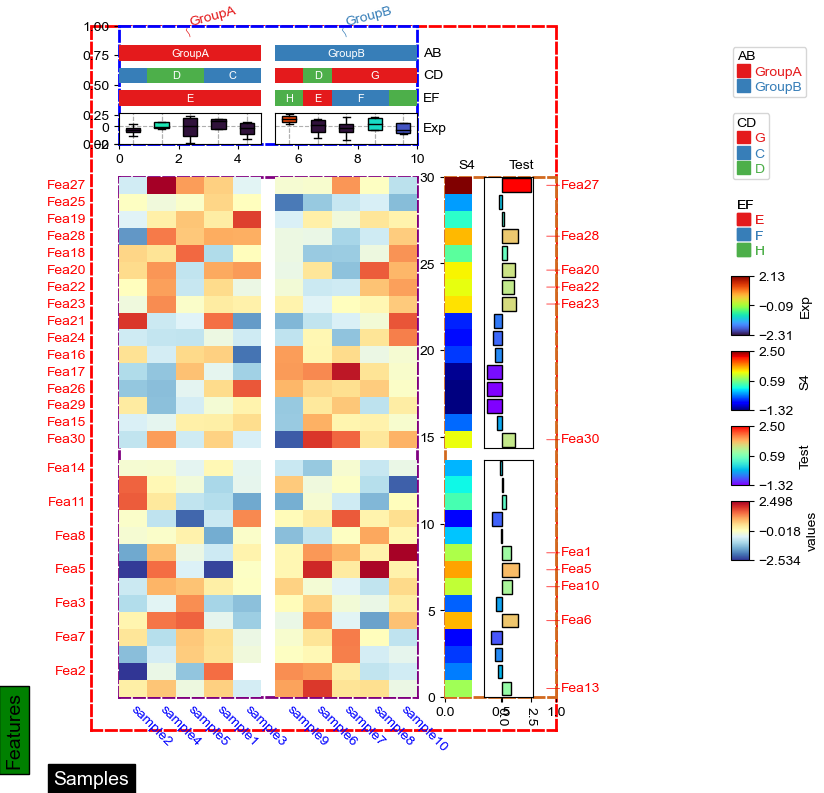

In [14]:
#Annotate the rows with average > 0.3
df_rows = df_heatmap.apply(lambda x:x.name if x.sample4 > 0.5 else None,axis=1)
df_rows=df_rows.to_frame(name='Selected')
df_rows['XY']=df_rows.index.to_series().apply(lambda x:'A' if int(x.replace('Fea',''))>=15 else 'B')

row_ha = HeatmapAnnotation(
            S4=anno_simple(df_heatmap.sample4.apply(lambda x:round(x,2)),
                       height=10,#add_text=True,
                       text_kws={'rotation':0,'fontsize':10,'color':'black'}),
            Test=anno_barplot(df_heatmap.sample4.apply(lambda x:round(x,2)),
                        height=18,cmap='rainbow'),
            selected=anno_label(df_rows,colors='red',relpos=(0,0.5)),
            axis=0,verbose=0,wgap=4,label_kws={'rotation':0,'horizontalalignment':'left',
                                        'verticalalignment':'bottom'})

col_ha = HeatmapAnnotation(
            label=anno_label(df.AB, merge=True,rotation=15),
            AB=anno_simple(df.AB,add_text=True,height=5),axis=1,
            CD=anno_simple(df.CD,add_text=True,height=5),
            EF=anno_simple(df.EF,add_text=True,height=5,
                            legend_kws={'frameon':False}),
            Exp=anno_boxplot(df_box, cmap='turbo',grid=True),
            verbose=0,hgap=2) #verbose=0 will turn off the log.

plt.figure(figsize=(6, 8))
cm = ClusterMapPlotter(
            data=df_heatmap, top_annotation=col_ha,right_annotation=row_ha,
            col_split=df.AB,
            row_split=df_rows.XY, 
            col_split_gap=3.5,row_split_gap=2.5,
            col_cluster=True,row_cluster=True,
            label='values',row_dendrogram=False,
            show_rownames=True,show_colnames=True,
            verbose=0,legend_gap=5,legend_hpad=10,legend_vpad=5,
            #annot=True,fmt='.1g',linewidths=0.05,linecolor='gold',
            cmap='RdYlBu_r',
            xticklabels_kws={'labelrotation':-45,'labelcolor':'blue'},
            yticklabels_kws=dict(labelcolor='red',pad=20),
            subplot_gap=8,
            xlabel='Samples',xlabel_kws=dict(color='white',fontsize=14,labelpad=25,position=(0,0)),
            xlabel_bbox_kws=dict(facecolor='black'),ylabel_bbox_kws=dict(facecolor='green'),
            ylabel='Features',ylabel_kws=dict(color='black',fontsize=14,labelpad=45,position=(0,0)),
) 
for ax,color in zip([cm.ax,cm.ax_heatmap,cm.ax_top,cm.ax_right],['red','purple','blue','chocolate']):
    for side in ["top", "right", "left", "bottom"]:
        ax.set_axis_on()
        # ax.yaxis.set_visible(True)
        # ax.xaxis.set_visible(True)
        ax.spines[side].set_visible(True)
        ax.spines[side].set_color(color)
        ax.spines[side].set_linewidth(2)
        ax.spines[side].set_linestyle('--')
plt.show()

In [11]:
cm.ax.xaxis.label.properties()

{'agg_filter': None,
 'alpha': None,
 'animated': False,
 'bbox_patch': <matplotlib.patches.FancyBboxPatch at 0x7f854d935760>,
 'children': [],
 'clip_box': None,
 'clip_on': True,
 'clip_path': None,
 'color': 'white',
 'figure': <Figure size 600x800 with 31 Axes>,
 'fontfamily': ['sans serif'],
 'fontname': 'Arial',
 'fontproperties': <matplotlib.font_manager.FontProperties at 0x7f854d8d56a0>,
 'fontsize': 14.0,
 'fontstyle': 'normal',
 'fontvariant': 'normal',
 'fontweight': 'normal',
 'gid': None,
 'horizontalalignment': 'center',
 'in_layout': True,
 'label': '',
 'math_fontfamily': 'dejavusans',
 'mouseover': False,
 'parse_math': True,
 'path_effects': [],
 'picker': None,
 'position': (0, 23.000000000000007),
 'rasterized': False,
 'rotation': 0.0,
 'rotation_mode': None,
 'sketch_params': None,
 'snap': None,
 'stretch': 'normal',
 'text': 'Samples',
 'tightbbox': Bbox([[37.125, 5.000000000000007], [112.875, 23.000000000000007]]),
 'transform': <matplotlib.transforms.BlendedAf

In [12]:
cm.ax.xaxis.label.get_bbox_patch().properties()

{'agg_filter': None,
 'alpha': None,
 'animated': False,
 'antialiased': True,
 'bbox': Bbox([[0.0, 0.0], [75.75, 18.0]]),
 'boxstyle': <matplotlib.patches.BoxStyle.Square at 0x7f854dded490>,
 'capstyle': 'butt',
 'children': [],
 'clip_box': None,
 'clip_on': True,
 'clip_path': None,
 'data_transform': <matplotlib.transforms.Affine2D at 0x7f854f0bbfd0>,
 'edgecolor': (0.0, 0.0, 0.0, 1.0),
 'extents': Bbox([[5.761576317947967, -0.6388888888888813], [92.78935409572574, 28.638888888888896]]),
 'facecolor': (0.0, 0.0, 0.0, 1.0),
 'figure': None,
 'fill': True,
 'gid': None,
 'hatch': None,
 'height': 18.0,
 'in_layout': True,
 'joinstyle': 'miter',
 'label': '',
 'linestyle': 'solid',
 'linewidth': 1.0,
 'mouseover': False,
 'mutation_aspect': 1,
 'mutation_scale': 19.444444444444443,
 'patch_transform': <matplotlib.transforms.IdentityTransform at 0x7f854d868730>,
 'path': Path(array([[-5.63888889, -5.63888889],
        [81.38888889, -5.63888889],
        [81.38888889, 23.63888889],
    